In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Introduction

#### Background

According to the World Health Organization (WHO), cardiovascular diseases (CVDs) are the leading cause of death worldwide, responsible for around 17.9 million deaths each year. Over 80% of these deaths are attributed to heart attacks and strokes, with one-third occurring prematurely in individuals under the age of 70. Given the significant impact of CVDs, early detection of those at risk is crucial for ensuring timely and appropriate treatment. In this study, we utilize a machine learning model based on the K-Nearest-Neighbors (K-NN) algorithm to predict the diagnosis of heart disease and identify individuals at risk.

#### Description of Features
- age: age in years
- sex: sex (1 = male, 0 = female)
- cp (chest_pain): chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
- trestbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality, T wave inversions and/or ST elevation or depression of > 0.05 mV; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalachh: maximum heart rate achieved
- exng: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slp: slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
- caa: number of major vessels (0-3) colored by flourosopy
- thall: (2 = normal; 1 = fixed defect; 3 = reversable defect)
- output (heart_disease): diagnosis of heart disease (angiographic disease status) (0 = < 50% diameter narrowing; 1 = > 50% diameter narrowing)

# Exploratory Analysis

#### Loading the Dataset

In [2]:
# Opening the dataset using Pandas dataframes
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
# Modification: we will appropriately rename target variable to heart_disease for readability
df.rename(columns={'output': 'heart_disease'}, inplace=True)
df.rename(columns={'cp': 'chest_pain'}, inplace=True)

#### Typical Data Point

In [4]:
# Taking a peek at our first sample from the data set
df.iloc[0]

age               63.0
sex                1.0
chest_pain         3.0
trtbps           145.0
chol             233.0
fbs                1.0
restecg            0.0
thalachh         150.0
exng               0.0
oldpeak            2.3
slp                0.0
caa                0.0
thall              1.0
heart_disease      1.0
Name: 0, dtype: float64

#### Size of Our Data

In [5]:
# shape of our data (303 samples, 14 features)
df.shape

(303, 14)

#### Balance of Our Data Set

In [6]:
# data is split ~55%: 1, ~45%: 0
df.heart_disease.value_counts()

heart_disease
1    165
0    138
Name: count, dtype: int64

#### Checking for Missing Values

In [7]:
# No missing data points
df.isnull().sum()

age              0
sex              0
chest_pain       0
trtbps           0
chol             0
fbs              0
restecg          0
thalachh         0
exng             0
oldpeak          0
slp              0
caa              0
thall            0
heart_disease    0
dtype: int64

In [8]:
# NOTE: should I remove this?
duplicates = df[df.duplicated()]
duplicates # entry 164 is duplicated

age  sex  chest_pain  trtbps  chol  fbs  restecg  thalachh  exng  \
164   38    1           2     138   175    0        1       173     0   

     oldpeak  slp  caa  thall  heart_disease  
164      0.0    2    4      2              1

#### Distribution of Attributes

In [9]:
# Description of Features
df.describe().T

count        mean        std    min    25%    50%    75%    max
age            303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex            303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
chest_pain     303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps         303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol           303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs            303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg        303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh       303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng           303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak        303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp            303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa            303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall          303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
heart_disease  303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

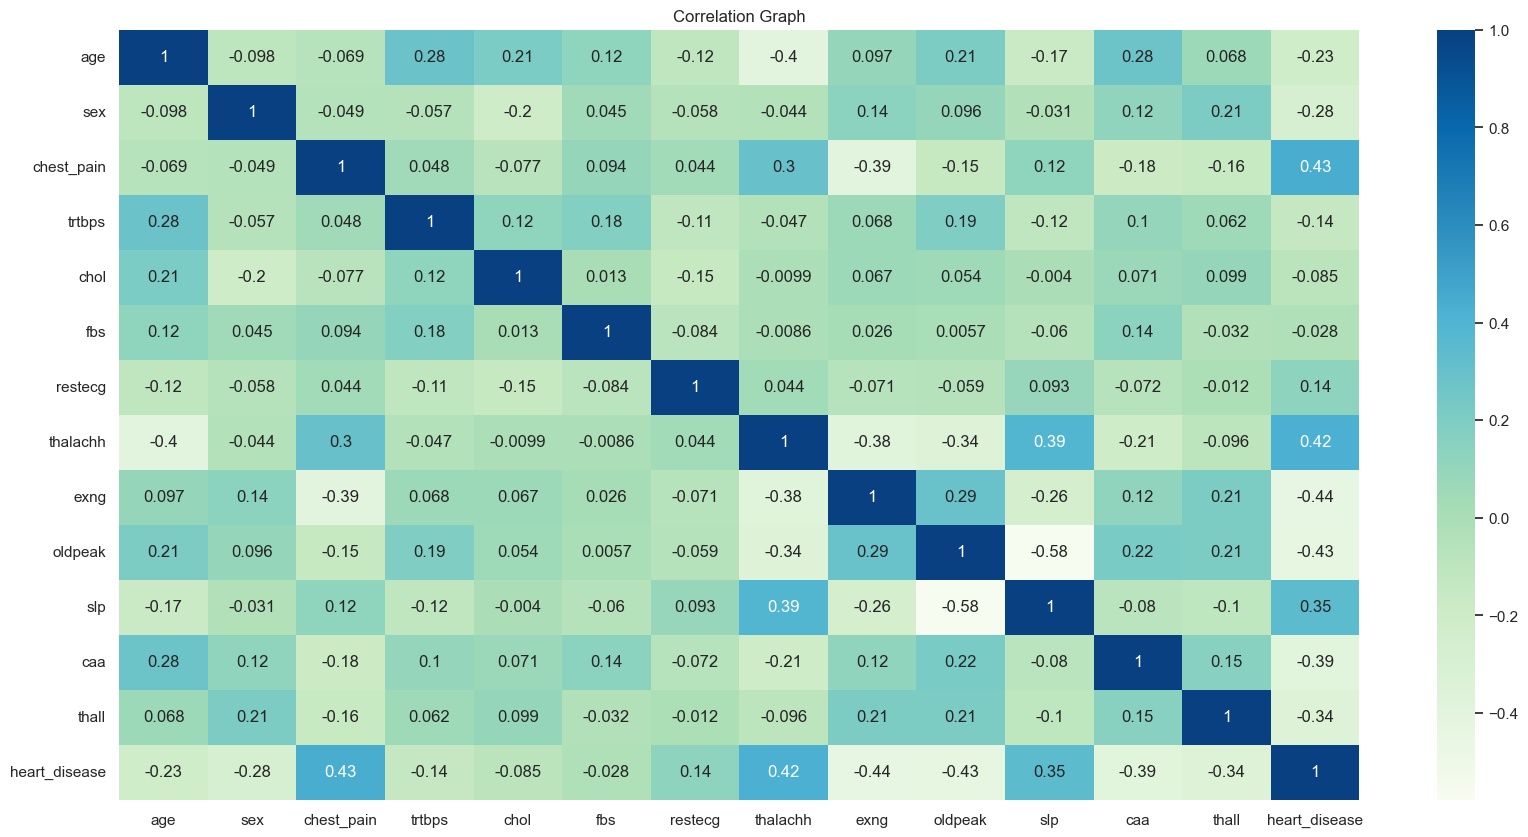

In [10]:
# Heatmap of correlation between all features
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

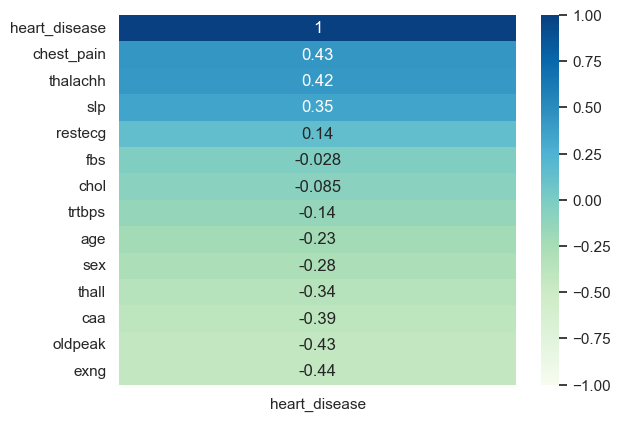

In [11]:
# Heatmap correlation between diagnosis of heart disease (target variable) and other features
sns.heatmap(df.corr()[['heart_disease']].sort_values\
    (by='heart_disease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

C:\Users\n7leg\AppData\Local\Temp\ipykernel_32836\2866381200.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'heart_disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

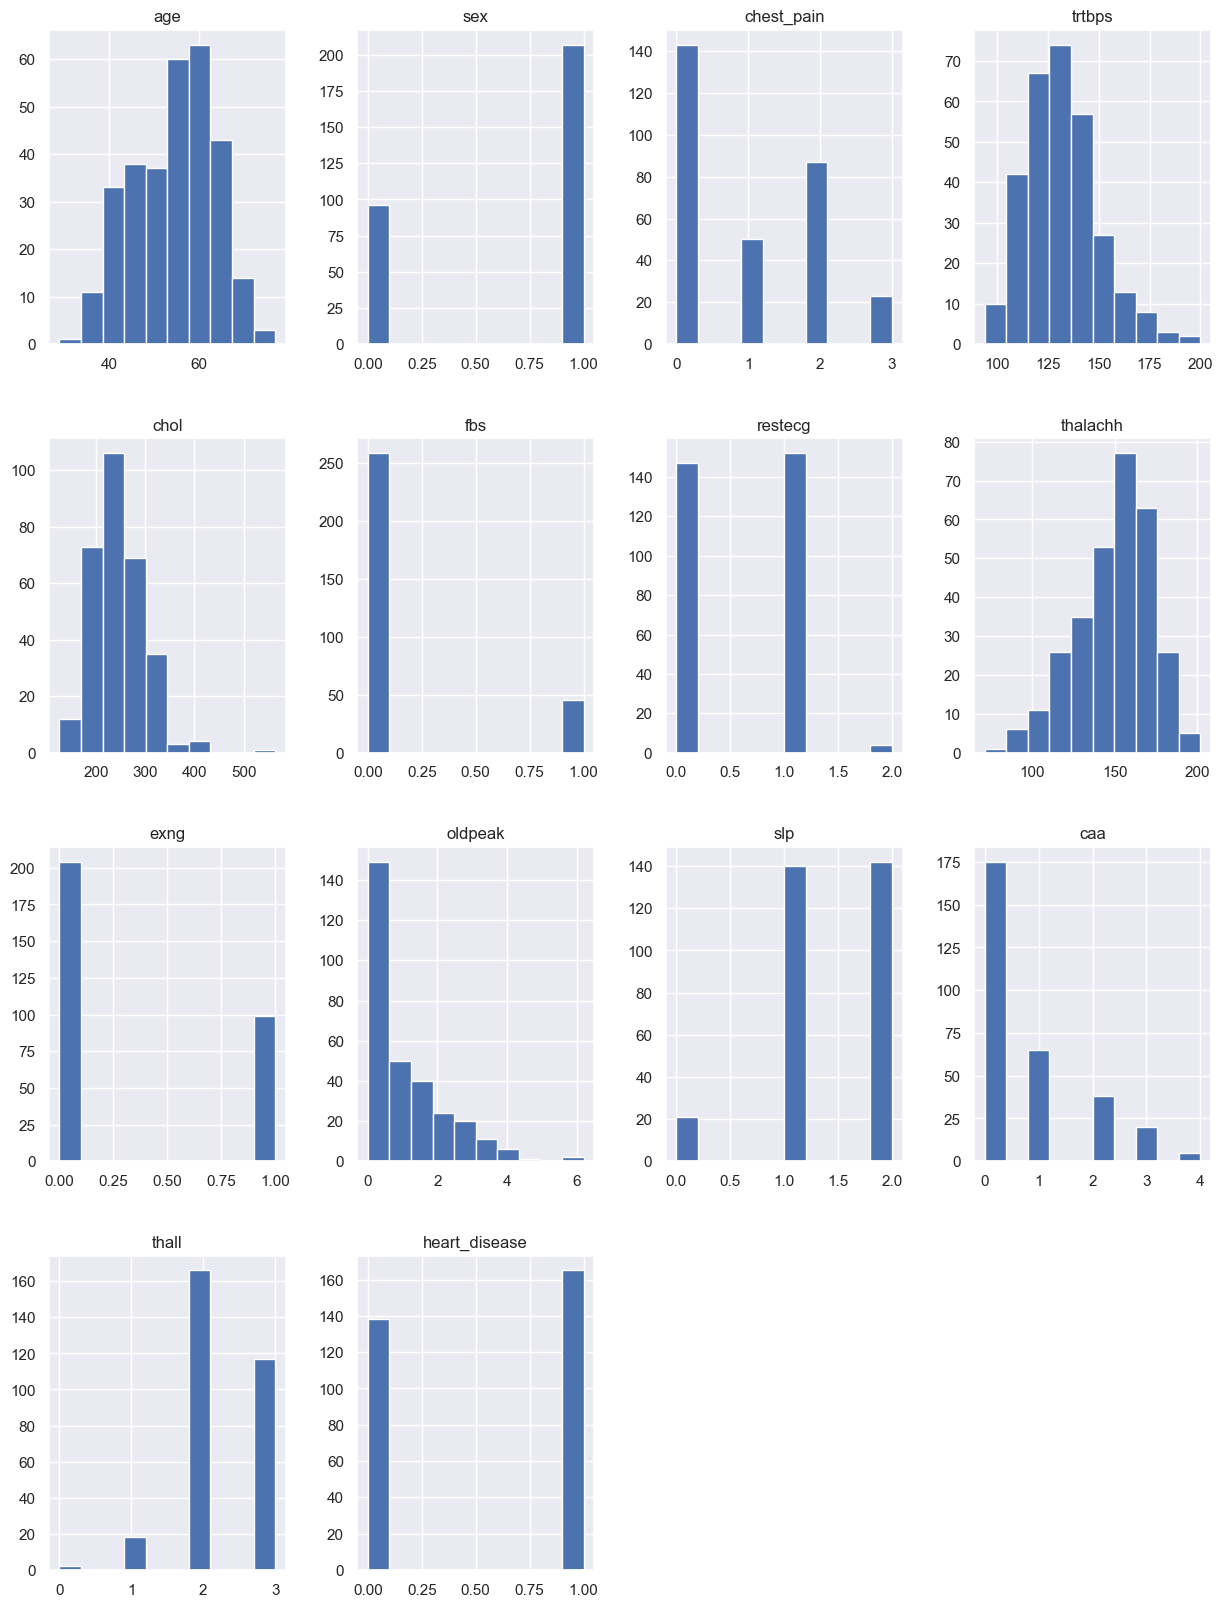

In [12]:
# Distribution of attributes
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

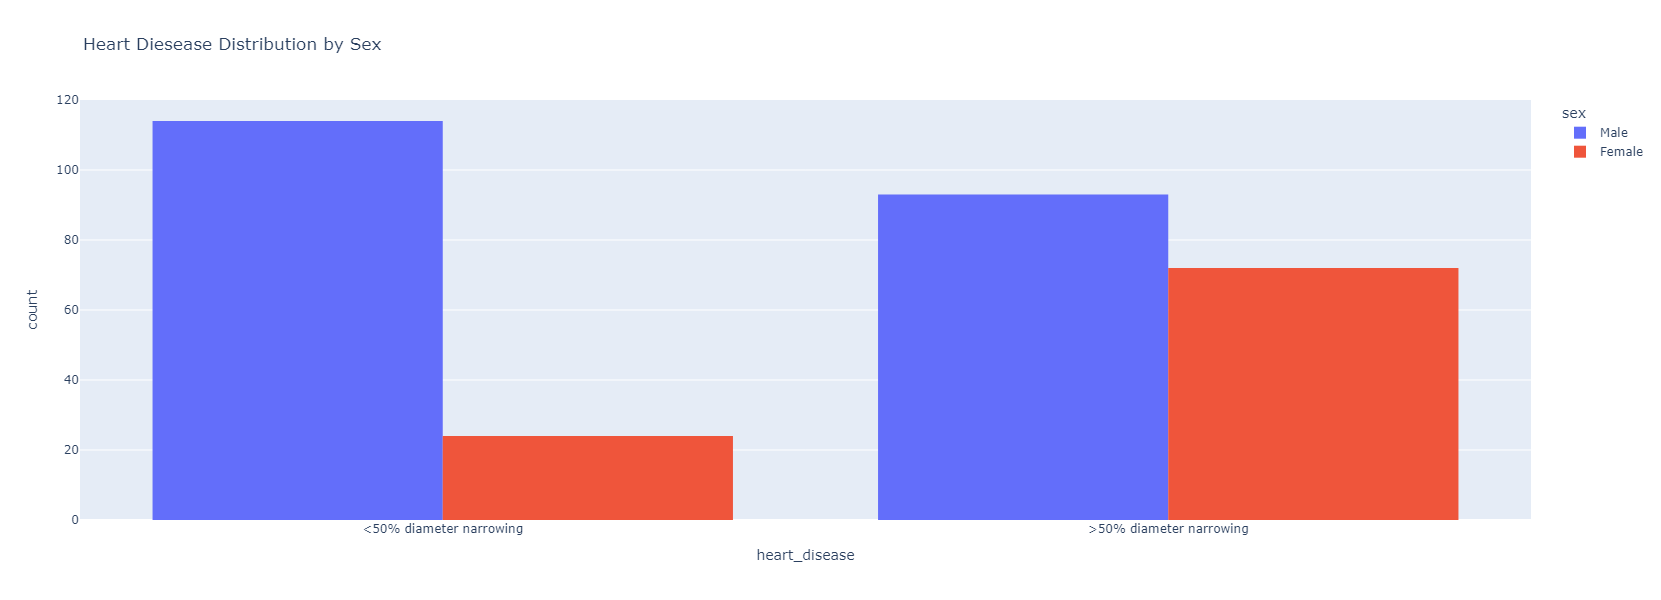

In [13]:
# Distribution of heart disease based on sex
fig=px.histogram(df,
                 x="heart_disease",
                 color="sex",
                 hover_data=df.columns,
                 title="Heart Diesease Distribution by Sex",
                 barmode="group",
                width=800,
                height=600)
# updating legend labels from 0 => Female and 1 => Male for readability
fig.for_each_trace(lambda t: t.update(name=t.name.replace('1', 'Male').replace('0', 'Female')))

# updating x-axis for better readability
fig.update_xaxes(
    tickvals=[0,1],
    ticktext=["<50% diameter narrowing",">50% diameter narrowing"]
)
fig.show()

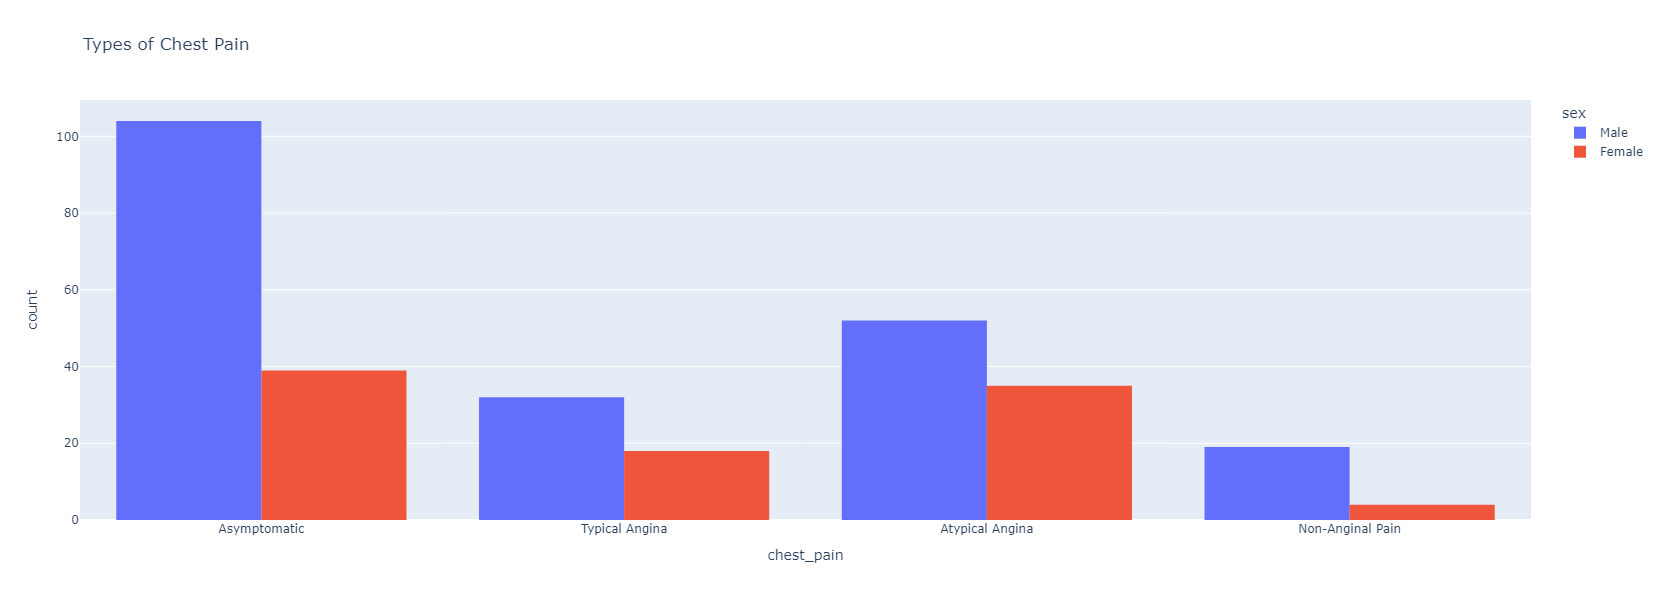

In [15]:
# Distribution of chest pain types
fig=px.histogram(df,
    x="chest_pain",
    color="sex",
    hover_data=df.columns,
    title="Types of Chest Pain",
    barmode="group",
    width=800,
    height=600
)

# updating legend labels from 0 => Female and 1 => Male for readability
fig.for_each_trace(lambda t: t.update(name=t.name.replace('1', 'Male').replace('0', 'Female')))

# updating x-axis for better readability
fig.update_xaxes(
    tickvals=[0,1,2,3],
    ticktext=["Asymptomatic","Typical Angina","Atypical Angina","Non-Anginal Pain"]
)

fig.show()

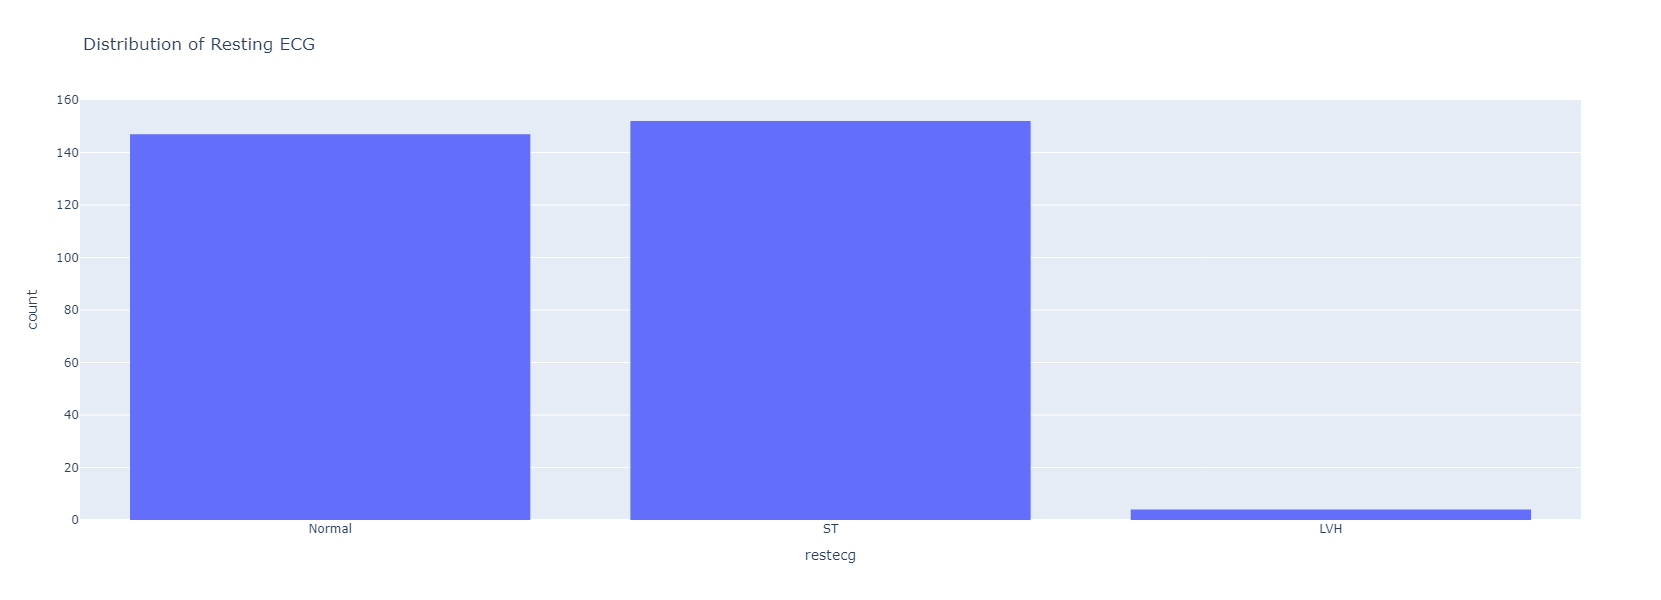

In [31]:
# Distribution of resting electrocardiogram (ECG)
fig=px.histogram(df,
                 x="restecg",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG",
                width=800,
                height=600)

fig.update_layout(
    bargap=0.2
)

fig.update_xaxes(
    tickvals=[0, 1, 2],  # Only display ticks at positions 0, 1, and 2
    ticktext=["Normal", "ST", "LVH"]  # Optional: customize tick labels
)

fig.show()

# Training & Testing our Model